# Classification Trashnet Datasets with Convolutional Neural Network

## Dataset Details

## Dataset Information: `garythung/trashnet`

This dataset is used for image classification of trash types, with the goal of identifying and classifying images of waste into several categories, such as cardboard, glass, metal, paper, plastic, and general trash.

### **Dataset Overview:**

- **Dataset Name**: `garythung/trashnet`
- **Number of Samples**: 5054 images
- **Data Types**:
  - **Image (image)**: Images containing various types of trash.
  - **Label (label)**: Labels indicating the type of trash in each image.

### **Labels in the Dataset:**
The labels available in this dataset are:
1. **cardboard**: Cardboard waste.
2. **glass**: Glass waste.
3. **metal**: Metal waste.
4. **paper**: Paper waste.
5. **plastic**: Plastic waste.
6. **trash**: General trash that does not fall under the other categories.

### **Dataset Structure:**
This dataset consists of two main features:
- **image**: The image of the trash, which can be processed by machine learning models.
- **label**: The numeric label indicating the type of trash in the image. These labels are mapped to their corresponding class names, such as `cardboard`, `glass`, `metal`, `paper`, `plastic`, and `trash`.

### **Data Structure (Output from Inspect):**
- **Number of Rows**: 5054 rows, meaning there are 5054 images in this dataset.
- **Features**:
  - `image`: The image of the trash to be processed.
  - `label`: The class label indicating the type of trash in the image.

### **Data Format**:
- **Images**: Each image in this dataset is an RGB image with varying sizes, which may need to be processed (e.g., resized) to ensure consistent dimensions before use in deep learning models.
- **Labels**: The label data is of type `ClassLabel`, which maps each numeric label to its corresponding class name.

### **Usage**:
This dataset is highly useful for building deep learning models for image classification, which can be used to detect and classify types of trash in images automatically. It is particularly suitable for applications related to waste management or recycling.

### **Dataset Access**:
This dataset can be accessed directly via Hugging Face using the `datasets` library. You can download it and use it to train machine learning or deep learning models for trash classification tasks.

## Access Datasets

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset

# Load dataset from HuggingFace
dataset = load_dataset("garythung/trashnet")
train_data = dataset['train']

# Inspect data structure
print(train_data)

# Inspect data structure
print(train_data.features)

print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

dataset-original.zip:   0%|          | 0.00/3.63G [00:00<?, ?B/s]

dataset-resized.zip:   0%|          | 0.00/42.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5054 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'label'],
    num_rows: 5054
})
{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], id=None)}
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5054
    })
})


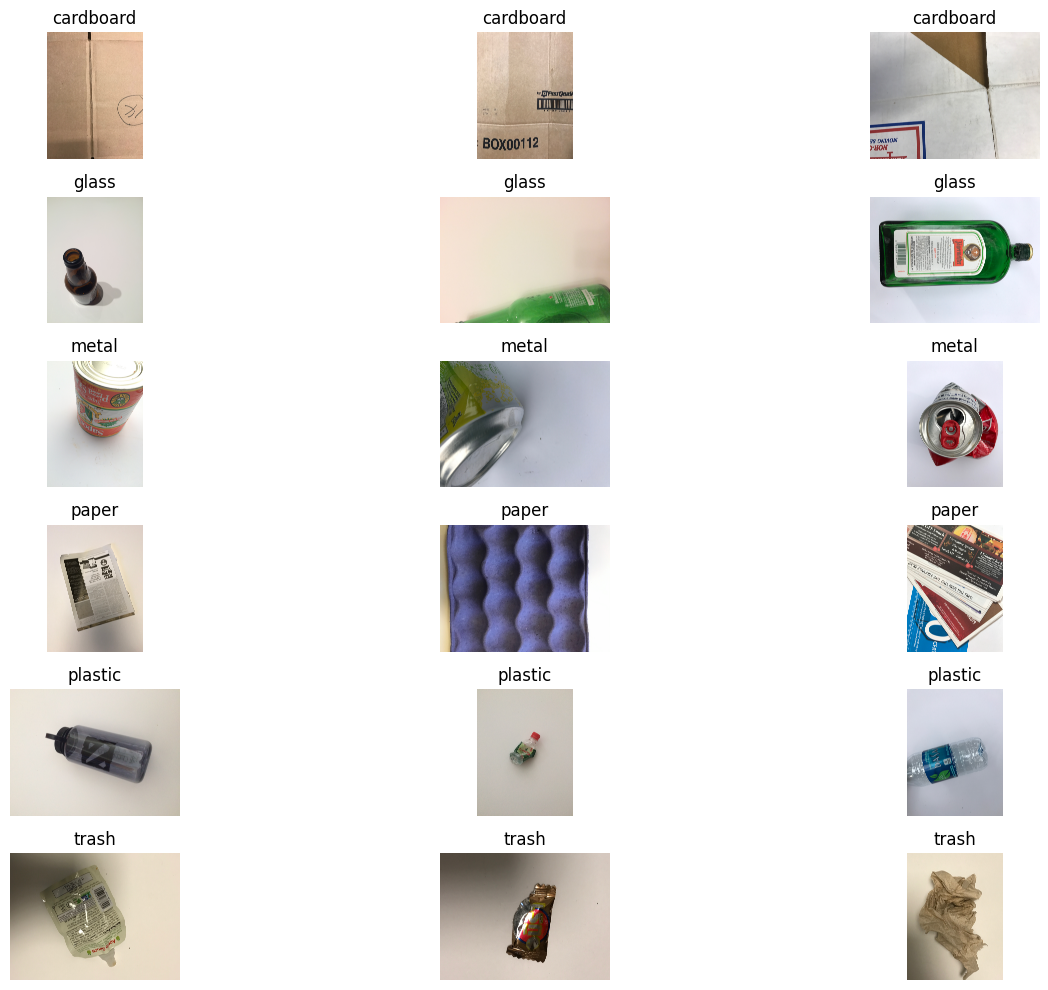

In [3]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load dataset from HuggingFace
dataset = load_dataset("garythung/trashnet")
train_data = dataset['train']

# Define labels
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# # Create a plot to display images
# fig, axes = plt.subplots(len(labels), 3, figsize=(15, 10))

# # Initialize counters for each label
# label_counters = {label: 0 for label in labels}

# # Iterate through the dataset and show 3 images for each label
# for i in range(len(train_data)):
#     # Get the current image and label
#     image = train_data[i]['image']
#     label = train_data[i]['label']

#     if label_counters[labels[label]] < 3:
#         # Display the image
#         axes[labels.index(labels[label]), label_counters[labels[label]]].imshow(image)
#         axes[labels.index(labels[label]), label_counters[labels[label]]].axis('off')
#         axes[labels.index(labels[label]), label_counters[labels[label]]].set_title(labels[label])

#         label_counters[labels[label]] += 1

#     if all(count == 3 for count in label_counters.values()):
#         break

# # Display the plot
# plt.tight_layout()
# plt.show()

## Setup and Requirements

In [4]:
# Import libraries
import tensorflow
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

## Data Preprocessing

### Split Dataset

In [5]:
# Split dataset into train and test datasets (80% train, 20% test)
train_data = dataset['train']
train_test_split = train_data.train_test_split(test_size=0.2, seed=42)

# Inspect the split data
train_data_split = train_test_split['train']
test_data_split = train_test_split['test']

# Print the sizes of the splits
print(f"Training dataset size: {len(train_data_split)}")
print(f"Testing dataset size: {len(test_data_split)}")

Training dataset size: 4043
Testing dataset size: 1011


In [6]:
from collections import Counter

# Get label counts for the training dataset
train_labels = train_data_split['label']
train_label_counts = Counter(train_labels)

# Get label counts for the testing dataset
test_labels = test_data_split['label']
test_label_counts = Counter(test_labels)

# Class names for labels
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Display label counts for training dataset
print("Training Dataset Label Counts:")
train_total_images = 0  # Initialize counter for total images in training dataset
for label, count in train_label_counts.items():
    print(f"{class_names[label]}: {count}")
    train_total_images += count

print(f"Total Training Images: {train_total_images}")

# Display label counts for testing dataset
print("\nTesting Dataset Label Counts:")
test_total_images = 0  # Initialize counter for total images in testing dataset
for label, count in test_label_counts.items():
    print(f"{class_names[label]}: {count}")
    test_total_images += count

print(f"Total Testing Images: {test_total_images}")

Training Dataset Label Counts:
glass: 795
paper: 944
plastic: 757
cardboard: 653
trash: 229
metal: 665
Total Training Images: 4043

Testing Dataset Label Counts:
cardboard: 153
plastic: 207
metal: 155
glass: 207
paper: 244
trash: 45
Total Testing Images: 1011


### Preparing Data

In [7]:
#Data Preparation
print("Preparing data...")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datasets import Dataset
import os

# Define a function to save images locally (since ImageDataGenerator needs file paths)
def save_images_locally(dataset, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    paths = []
    for idx, data in enumerate(dataset):
        img = data['image']
        label = data['label']
        class_name = class_names[label]
        class_dir = os.path.join(output_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        img_path = os.path.join(class_dir, f"{idx}.jpg")
        img.save(img_path)
        paths.append((img_path, class_name))
    return paths

# Save training and testing images locally
train_dir = "train_images"
test_dir = "test_images"
train_paths = save_images_locally(train_data_split, train_dir)
test_paths = save_images_locally(test_data_split, test_dir)

# Create DataFrames for ImageDataGenerator
import pandas as pd

train_df = pd.DataFrame(train_paths, columns=["image", "label"])
test_df = pd.DataFrame(test_paths, columns=["image", "label"])

# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,  # Increased zoom range
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    brightness_range=[0.8, 1.2],  # Random brightness
    channel_shift_range=20.0  # Random color channel shifts
)


test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # No augmentation for test data

# Set up ImageDataGenerators for training and validation data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image",
    y_col="label",
    target_size=(224, 224),       # Resize to fit pre-trained models
    batch_size=32,
    class_mode="categorical"      # Multi-class classification
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Print generators info
print(f"Train generator size: {train_generator.n}")
print(f"Test generator size: {test_generator.n}")

Preparing data...
Found 4043 validated image filenames belonging to 6 classes.
Found 1011 validated image filenames belonging to 6 classes.
Train generator size: 4043
Test generator size: 1011


In [ ]:
train_generator.shape
test_generator.shape

## Exploratory Image Analysis

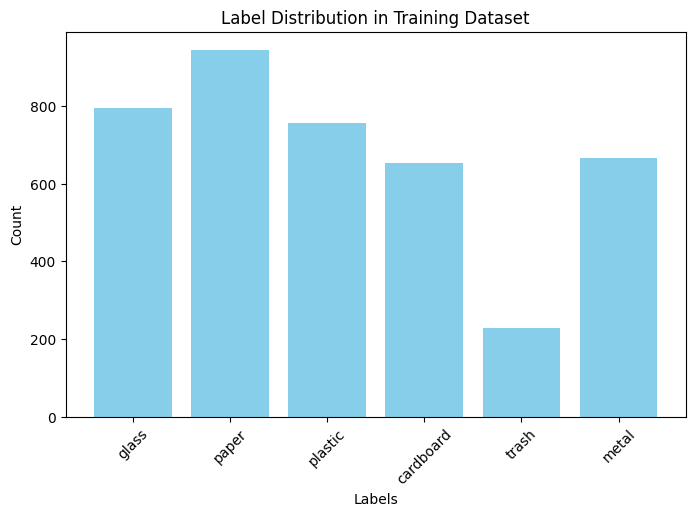

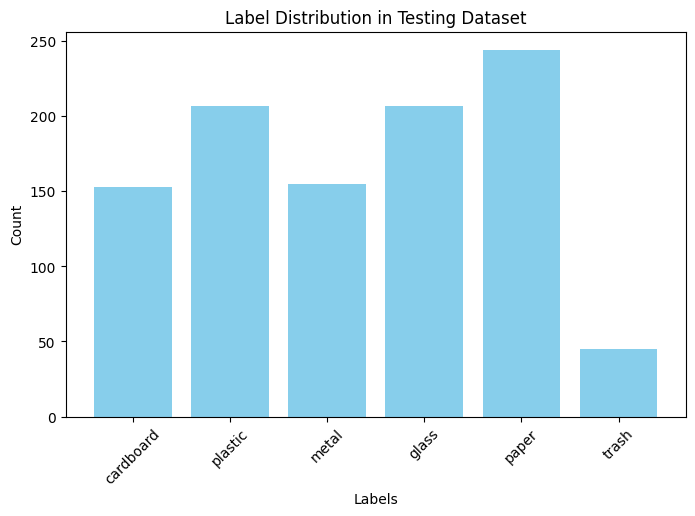

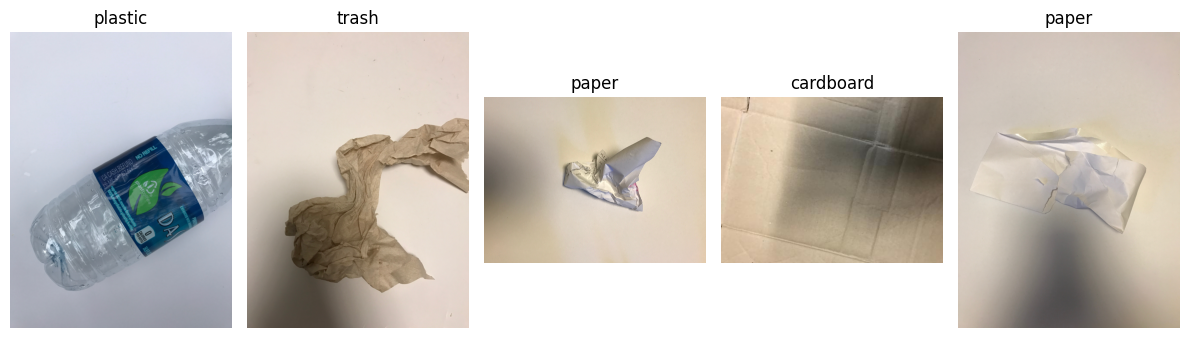

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Class names for labels
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# 1. Distribusi Label pada Dataset
def plot_label_distribution(data_split, split_name):
    label_counts = Counter(data_split['label'])
    labels = [class_names[label] for label in label_counts.keys()]
    counts = list(label_counts.values())

    plt.figure(figsize=(8, 5))
    plt.bar(labels, counts, color='skyblue')
    plt.title(f"Label Distribution in {split_name} Dataset")
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Plot label distribution for training and testing datasets
plot_label_distribution(train_data_split, "Training")
plot_label_distribution(test_data_split, "Testing")

# 2. Visualisasi Beberapa Gambar
def visualize_sample_images(data_split, num_images=5):
    plt.figure(figsize=(12, 6))
    sample_data = data_split.shuffle(seed=42).select(range(num_images))  # Randomly select images
    for i, data in enumerate(sample_data):
        img = data['image']
        label = class_names[data['label']]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize sample images from the training dataset
visualize_sample_images(train_data_split)

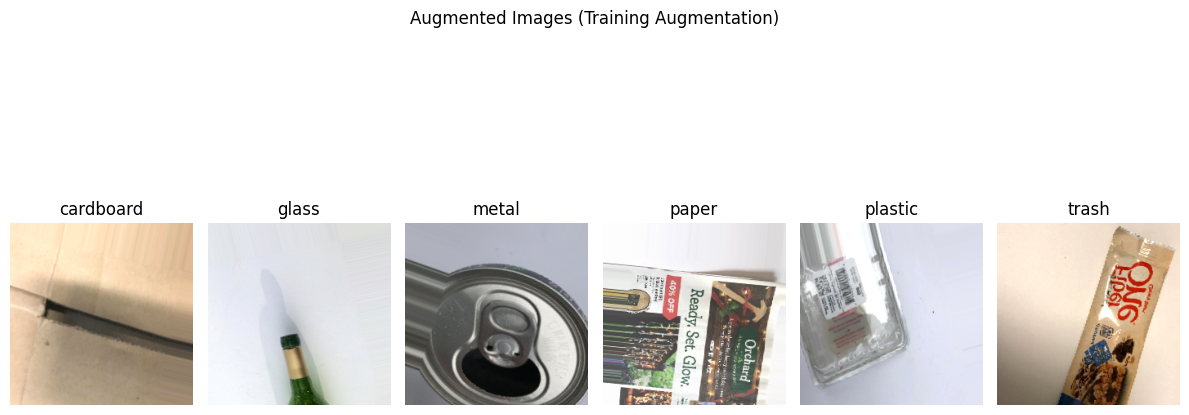

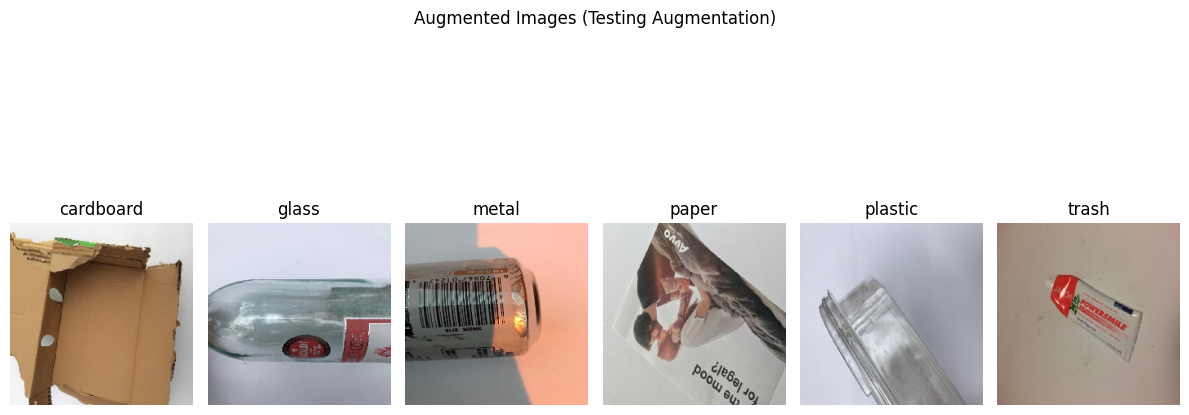

In [9]:
# Function to display one augmented image per label
def visualize_augmented_images(generator, split_name, class_names):
    # Fetch a batch of data from the generator
    batch_images, batch_labels = next(generator)

    plt.figure(figsize=(12, 6))
    unique_labels = np.argmax(batch_labels, axis=1)
    unique_classes = np.unique(unique_labels)

    for i, label in enumerate(unique_classes):
        # Find the index of the first occurrence of this label
        idx = np.where(unique_labels == label)[0][0]

        # Get the image and label
        img = batch_images[idx]
        label_name = class_names[label]

        # Plot the image
        plt.subplot(1, len(unique_classes), i + 1)
        plt.imshow(img)
        plt.title(label_name)
        plt.axis("off")

    plt.suptitle(f"Augmented Images ({split_name})")
    plt.tight_layout()
    plt.show()

# Visualize one image per label from training data augmentation
visualize_augmented_images(train_generator, "Training Augmentation", class_names)

# Visualize one image per label from testing data augmentation
visualize_augmented_images(test_generator, "Testing Augmentation", class_names)

## Model Training and Evaluation Analysis

### Build Model Using Convolutional Neural Network

In [10]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(class_names), activation='softmax')  # Output layer with class count
    ])
    return model

In [11]:
# Compile the model
model = create_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Model Architecture

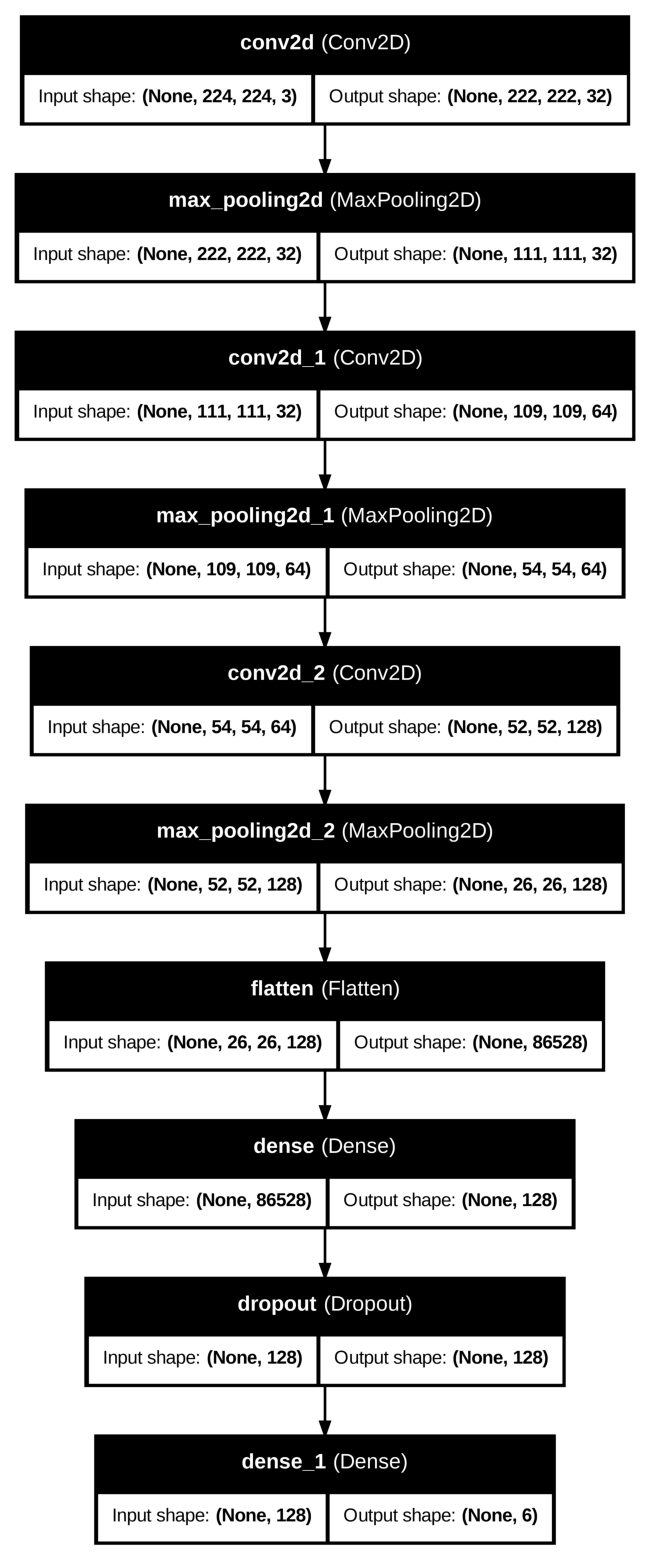

In [13]:
# Import the required library
from tensorflow.keras.utils import plot_model


plot_model(model, to_file='model_architecture_CNN.png', show_shapes=True, show_layer_names=True, dpi=400)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('model_architecture_CNN.png')


plt.figure(figsize=(30, 20))
plt.imshow(img)
plt.axis('off')
plt.show()

### Model FItting

In [15]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 785s 6s/step - accuracy: 0.4463 - loss: 1.3723 - val_accuracy: 0.4899 - val_loss: 1.2820
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4375 - loss: 1.2347 - val_accuracy: 0.7368 - val_loss: 0.9196
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 789s 6s/step - accuracy: 0.4817 - loss: 1.3091 - val_accuracy: 0.5645 - val_loss: 1.1838
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.4375 - loss: 1.5463 - val_accuracy: 0.7368 - val_loss: 0.9534
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 809s 6s/step - accuracy: 0.4818 - loss: 1.2901 - val_accuracy: 0.5716 - val_loss: 1.1750
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4688 - loss: 1.3586 - val_accuracy: 0.6316 - val_loss: 1.0757
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 785s 6s/step - accuracy: 0.5242 - loss: 1.2099 - val_accuracy: 0.5766 - val_loss: 1.1934
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.5000 - loss: 1.2607 - val_accu

In [16]:
# Save the model
model.save("trash_classifier_model.h5")

### Evaluation

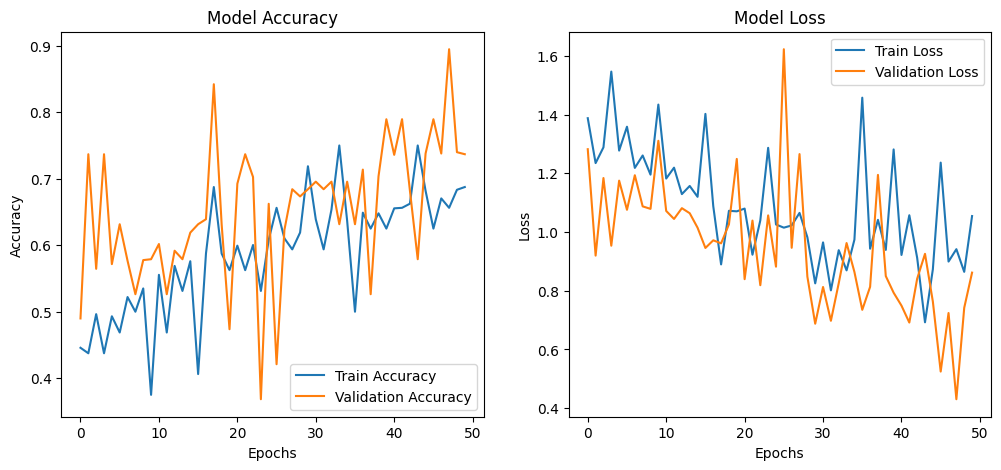

In [17]:
# Plot training and validation accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

### Classification Report

32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.7305 - loss: 0.7822
Test Accuracy: 73.10%
32/32 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.14      0.13      0.13       153
       glass       0.16      0.11      0.13       207
       metal       0.15      0.17      0.16       155
       paper       0.22      0.29      0.25       244
     plastic       0.22      0.18      0.20       207
       trash       0.04      0.04      0.04        45

    accuracy                           0.18      1011
   macro avg       0.15      0.16      0.15      1011
weighted avg       0.18      0.18      0.18      1011



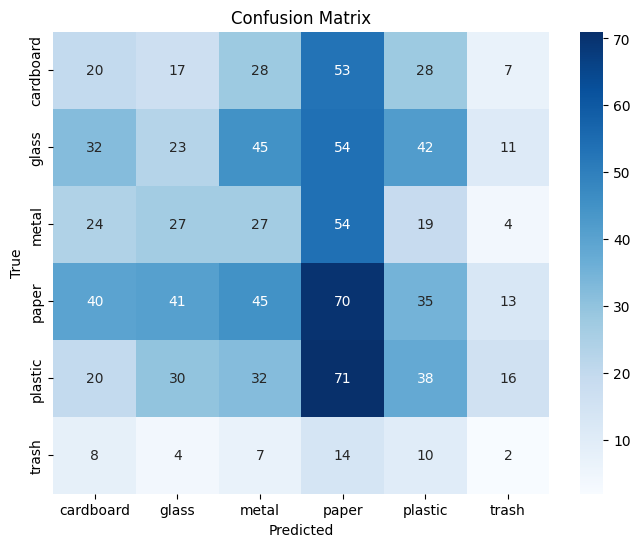

In [18]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test data
test_generator.reset()  # Reset generator
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━

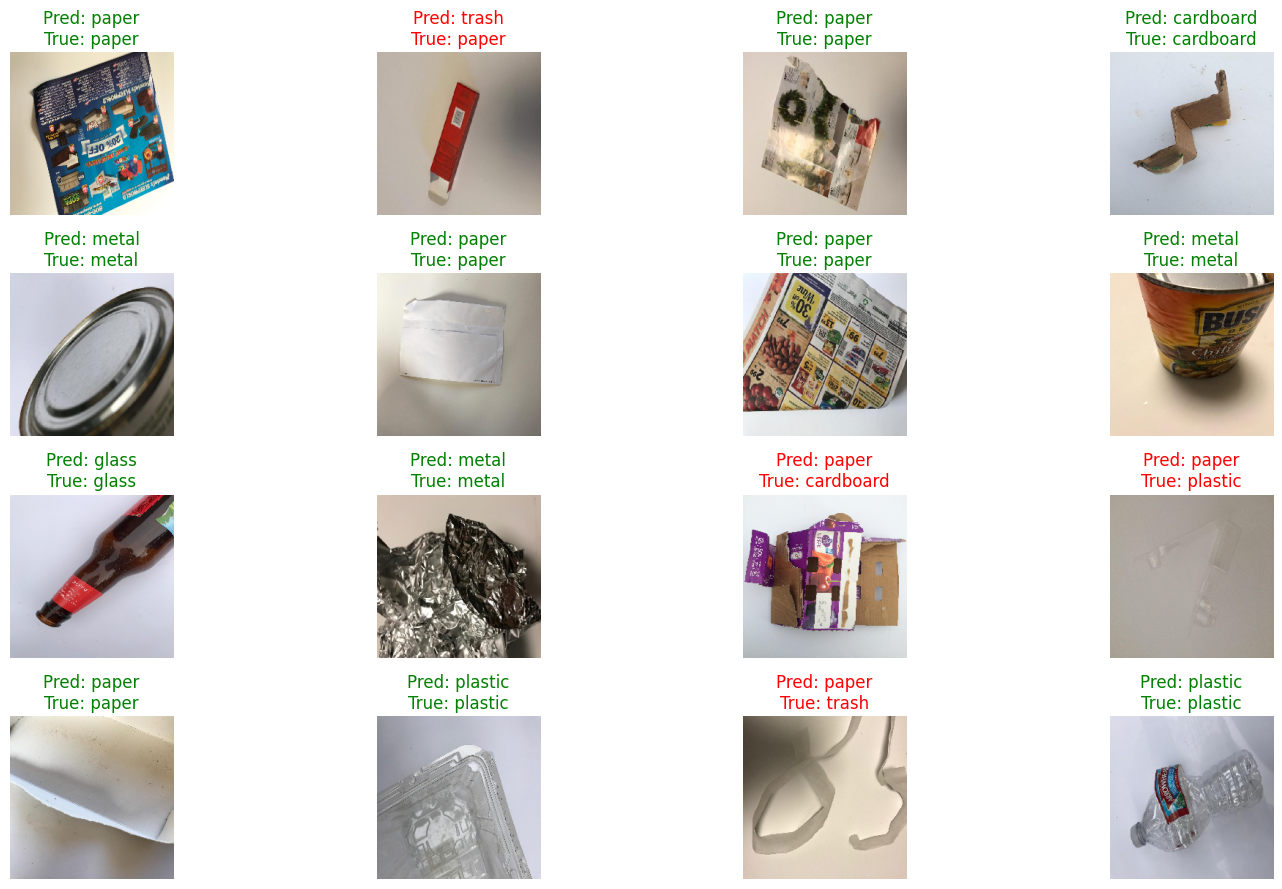

In [19]:
# Process all data batches from the test generator
test_data = {"images": [], "true_labels": [], "predicted_labels": []}

for images, labels in test_generator:
    # Predict the current batch
    preds = model.predict(images)

    # Store images, true labels, and predicted labels
    test_data["images"].extend(images)
    test_data["true_labels"].extend(np.argmax(labels, axis=1))  # Convert one-hot to class indices
    test_data["predicted_labels"].extend(np.argmax(preds, axis=1))  # Predicted class indices

    # Stop when all test data is processed
    if len(test_data["images"]) >= test_generator.n:
        break

# Convert lists to numpy arrays for easier manipulation
test_data["images"] = np.array(test_data["images"])
test_data["true_labels"] = np.array(test_data["true_labels"])
test_data["predicted_labels"] = np.array(test_data["predicted_labels"])

# Visualize random test samples with predictions
plt.figure(figsize=(16, 9))
random_indices = np.random.choice(len(test_data["images"]), size=16, replace=False)

for i, idx in enumerate(random_indices):
    ax = plt.subplot(4, 4, i + 1)
    ax.imshow(test_data["images"][idx])  # Display the test image
    true_label = class_names[test_data["true_labels"][idx]]
    predicted_label = class_names[test_data["predicted_labels"][idx]]
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}",
                 color="green" if true_label == predicted_label else "red")
    ax.axis("off")  # Hide axes for clarity

plt.tight_layout()
plt.show()

In [20]:
!pip freeze > requirements.txt

In [21]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Open (or create) the README.md file and write detailed content including CNN explanation
with open('README.md', 'w') as f:
    f.write("# Trash Classification Using Deep Learning\n\n")
    f.write("## Project Overview\n\n")
    f.write("This project demonstrates how to classify images of trash into different categories using deep learning techniques. "
              "The model is trained to recognize six types of waste: cardboard, glass, metal, paper, plastic, and trash, based on images. "
              "The data is sourced from the `garythung/trashnet` dataset hosted on Hugging Face, and the model is built using a Convolutional Neural Network (CNN) architecture with TensorFlow/Keras.\n\n")

    f.write("## Dataset\n\n")
    f.write("The dataset used in this project is the **TrashNet** dataset, which contains labeled images of various types of trash. "
              "The dataset is divided into six categories:\n\n")
    f.write("- **Cardboard**\n")
    f.write("- **Glass**\n")
    f.write("- **Metal**\n")
    f.write("- **Paper**\n")
    f.write("- **Plastic**\n")
    f.write("- **Trash**\n\n")

    f.write("Each image is labeled with one of these categories, making the task a **multi-class classification** problem.\n\n")
    f.write("The dataset is loaded directly from Hugging Face using the `datasets` library and is split into training and testing sets. "
              "The dataset is further augmented for better generalization.\n\n")

    f.write("### Data Preprocessing\n\n")
    f.write("1. **Saving Images Locally**: Images are downloaded and saved locally using a custom function. "
              "This is essential for use with `ImageDataGenerator`, which requires file paths to work.\n")
    f.write("2. **Data Augmentation**: Data augmentation is applied to the training data to improve the model's generalization ability. "
              "The augmentations include random rotations, width/height shifts, flips, zooming, and brightness adjustments.\n")
    f.write("3. **Data Splitting**: The dataset is split into 80% training and 20% testing using `train_test_split` from `datasets`.\n\n")

    f.write("## Installation\n\n")
    f.write("To run the project, you need to install the following dependencies:\n\n")
    f.write("```bash\n")
    f.write("pip install datasets tensorflow matplotlib numpy seaborn scikit-learn pandas\n")
    f.write("```\n\n")

    f.write("Additionally, if you're working in a Jupyter environment, use the following to ensure correct visualization:\n\n")
    f.write("```bash\n")
    f.write("pip install jupyter\n")
    f.write("```\n\n")

    f.write("## Project Structure\n\n")
    f.write("```bash\n")
    f.write("/\n")
    f.write("├── model_architecture_CNN.png    # Image showing the CNN model architecture\n")
    f.write("├── trash_classifier_model.h5     # Trained deep learning model (saved after training)\n")
    f.write("└── README.md                     # This file\n")
    f.write("```\n\n")

    f.write("## Model Architecture\n\n")
    f.write("The model is built using a Convolutional Neural Network (CNN), which is a type of deep learning model commonly used for image classification tasks. "
              "The architecture is as follows:\n\n")

    f.write("1. **Conv2D Layers**: Convolutional layers extract features from the images by applying filters. These filters help detect various patterns such as edges, textures, and shapes in the image. "
              "The filters are learned during the training process, allowing the model to automatically recognize relevant features.\n")
    f.write("2. **MaxPooling2D Layers**: These layers downsample the spatial dimensions, reducing computational complexity while retaining essential features. "
              "Max pooling helps make the model more invariant to small translations and distortions in the image.\n")
    f.write("3. **Flatten Layer**: This layer flattens the 2D output of the convolutional layers into a 1D array for classification. It prepares the features for input to the fully connected layers.\n")
    f.write("4. **Dense Layers**: These fully connected layers interpret the extracted features and make predictions based on the learned features. The more units in the dense layer, the more complex the model is.\n")
    f.write("5. **Output Layer**: The output layer has 6 units (one for each class), with a softmax activation function, which outputs probabilities for each class. "
              "The softmax function ensures that the outputs are normalized into a probability distribution.\n\n")

    f.write("The model is compiled with the Adam optimizer and categorical crossentropy loss, as this is a multi-class classification problem.\n\n")

    f.write("### CNN Model:\n\n")
    f.write("```python\n")
    f.write("def create_model():\n")
    f.write("    model = Sequential([\n")
    f.write("        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),\n")
    f.write("        MaxPooling2D((2, 2)),\n")
    f.write("        Conv2D(64, (3, 3), activation='relu'),\n")
    f.write("        MaxPooling2D((2, 2)),\n")
    f.write("        Conv2D(128, (3, 3), activation='relu'),\n")
    f.write("        MaxPooling2D((2, 2)),\n")
    f.write("        Flatten(),\n")
    f.write("        Dense(128, activation='relu'),\n")
    f.write("        Dropout(0.5),\n")
    f.write("        Dense(len(class_names), activation='softmax')\n")
    f.write("    ])\n")
    f.write("    return model\n")
    f.write("```\n\n")

    f.write("### Compilation:\n\n")
    f.write("```python\n")
    f.write("model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])\n")
    f.write("```\n\n")

    f.write("### Model Summary:\n\n")
    f.write("```bash\n")
    f.write("Model: \"sequential\"\n")
    f.write("_________________________________________________________________\n")
    f.write("Layer (type)                 Output Shape              Param #\n")
    f.write("=================================================================\n")
    f.write("conv2d (Conv2D)              (None, 222, 222, 32)      896\n")
    f.write("max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0\n")
    f.write("conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496\n")
    f.write("max_pooling2d_1 (MaxPooling (None, 54, 54, 64)        0\n")
    f.write("conv2d_2 (Conv2D)            (None, 52, 52, 128)      73856\n")
    f.write("max_pooling2d_2 (MaxPooling (None, 26, 26, 128)      0\n")
    f.write("flatten (Flatten)            (None, 85888)             0\n")
    f.write("dense (Dense)                (None, 128)               10913952\n")
    f.write("dropout (Dropout)            (None, 128)               0\n")
    f.write("dense_1 (Dense)              (None, 6)                 774\n")
    f.write("=================================================================\n")
    f.write("```\n\n")

    f.write("## Model Training\n\n")
    f.write("The model is trained for **50 epochs** using a batch size of 32. The training and validation accuracy, as well as the loss values, "
              "are plotted during training to monitor the model's performance.\n\n")
    f.write("```python\n")
    f.write("history = model.fit(\n")
    f.write("    train_generator,\n")
    f.write("    validation_data=test_generator,\n")
    f.write("    epochs=50,\n")
    f.write("    steps_per_epoch=train_generator.samples // train_generator.batch_size,\n")
    f.write("    validation_steps=test_generator.samples // test_generator.batch_size\n")
    f.write(")\n")
    f.write("```\n\n")

    f.write("## Evaluation and Performance\n\n")
    f.write("After training, the model is evaluated on the testing set:\n\n")
    f.write("```python\n")
    f.write("test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)\n")
    f.write("print(f\"Test Accuracy: {test_accuracy * 100:.2f}%\")\n")
    f.write("```\n\n")

    f.write("### Confusion Matrix & Classification Report\n\n")
    f.write("The model's performance is further evaluated using a **confusion matrix** and **classification report**, "
              "which provide insights into the model's accuracy, precision, recall, and F1-score for each class.\n\n")
    f.write("```python\n")
    f.write("print(\"\nClassification Report:\")\n")
    f.write("print(classification_report(true_labels, predicted_labels, target_names=class_names))\n")
    f.write("\n")
    f.write("cm = confusion_matrix(true_labels, predicted_labels)\n")
    f.write("sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)\n")
    f.write("```\n\n")

    f.write("## Visualization\n\n")
    f.write("Random test samples are visualized with their true and predicted labels to evaluate how well the model performs on unseen data.\n\n")
    f.write("```python\n")
    f.write("plt.figure(figsize=(16, 9))\n")
    f.write("random_indices = np.random.choice(len(test_data[\"images\"]), size=16, replace=False)\n")
    f.write("```\n\n")

    f.write("## Saving the Model\n\n")
    f.write("After training, the model is saved in the **H5** format for later use:\n\n")
    f.write("```python\n")
    f.write("model.save(\"trash_classifier_model.h5\")\n")
    f.write("```\n\n")

    f.write("## Conclusion\n\n")
    f.write("This project provides a robust solution for classifying trash into different categories using deep learning. "
              "The use of CNNs allows for automatic feature extraction from the images, and data augmentation improves the model's ability to generalize. "
              "The evaluation metrics ensure that the model performs well across all six classes.\n")

print("README.md file has been created successfully.")


README.md file has been created successfully.


## WandB

In [27]:
import wandb
# Login to wandb account
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [28]:
run = wandb.init(
    # Set the project where this run will be logged
    project="Take Home Test AI Engineer",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.001,
        "epochs": 50,
        "batch_size": 32
    },
)

wandb: Currently logged in as: muhammadrizkyanugrah179 (muhammadrizkyanugrah179-universitas-negeri-jakarta). Use `wandb login --relogin` to force relogin


In [30]:
from wandb.integration.keras import WandbCallback, WandbMetricsLogger
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[
        WandbMetricsLogger()
    ]
)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 760s 6s/step - accuracy: 0.6726 - loss: 0.8743 - val_accuracy: 0.7488 - val_loss: 0.7052
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 855s 6s/step - accuracy: 0.6955 - loss: 0.8333 - val_accuracy: 0.7517 - val_loss: 0.6448
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 776s 6s/step - accuracy: 0.6958 - loss: 0.7947 - val_accuracy: 0.7448 - val_loss: 0.7104
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 810s 6s/step - accuracy: 0.6774 - loss: 0.8739 - val_accuracy: 0.7458 - val_loss: 0.6821
Epoch 5/10
 28/127 ━━━━━━━━━━━━━━━━━━━━ 9:07 6s/step - accuracy: 0.7055 - loss: 0.7845

KeyboardInterrupt: 

In [31]:
wandb.finish()

epoch/accuracy,▃▄█▁
epoch/epoch,▁▃▆█
epoch/learning_rate,▁▁▁▁
epoch/loss,▆▅▁█
epoch/val_accuracy,▅█▁▂
epoch/val_loss,▇▁█▅
epoch/accuracy,0.67376
epoch/epoch,3
epoch/learning_rate,0.001
epoch/loss,0.87467
epoch/val_accuracy,0.7458
